# Deep Learning week - Day 4 - Exercise 2

In this exercise, we will use stock market values that you have observed over some days or weeks, and from them, you will try to predict the stock market value in the future. 


# The data

The correct way to do that is to consider different stock market values, where the first sequence corresponds to the values of the company A, the second to the company B, etc etc. Loading so many data and fitting neural networks on them might require some preprocessing and some time to train. 

Therefore, we will here do a bit differently. We will take a unique stock market value, and we will select some part of it, as each part corresponded to a given stock-market (the problem is that each part is not independant from the other, but let's assume they are for the sake of the exercise).

❓ **Question** ❓ Run the following functions - we will use the `Middle` column as the stock market price

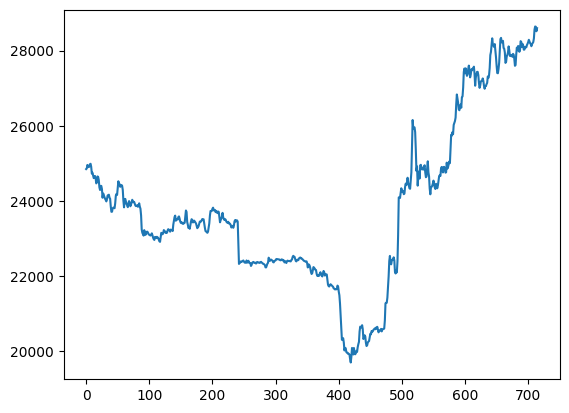

In [1133]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./Data/btc_prices.csv')
df = df.sort_values('Datetime')

df['Middle'] = (df['High'] + df['Low'])/2.

# data = df['Adj Close'].values
data = df['Middle'].values

plt.plot(data)
plt.show()

❓ **Question** ❓ Normalize the data (just divide by the mean value) and plot the histogram of the resulting value to  check that they are somehow close to 0 / 1. 

In [1134]:
# To complete


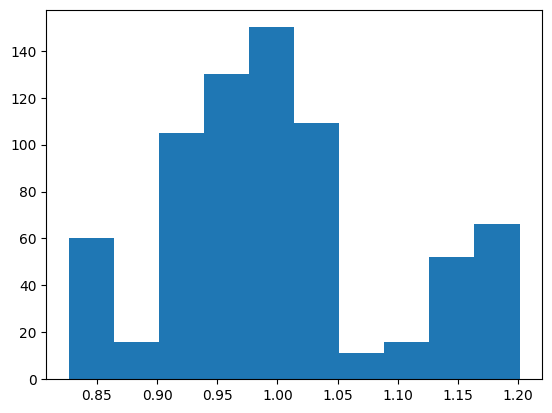

In [1135]:
##############
### Answer ###
##############

import numpy as np

data = data / np.mean(data)
plt.hist(data)
plt.show()

# Data preprocessing

Out of this very long time-series, we will subsample it into shorter samples, each corresponding to one sequence of data $X_i$ with its corresponding prediction $y_i$.

We will use the following function to get this random sample.

❓ **Question** ❓ Run the function with different `length` an `temporal_horizon` to see what it does.

In [1136]:
def get_sample(data, length, temporal_horizon):

    temporal_horizon = temporal_horizon - 1
    last_possible = np.abs(len(data) - temporal_horizon - length)
    random_start = np.random.randint(0, last_possible)
    X_sample = data[random_start: random_start+length]
    X_sample = [[_] for _ in X_sample]
    
    
    y_sample = data[random_start+length+temporal_horizon]
        
    return X_sample, y_sample


# To complete

In [1137]:
##############
### Answer ###
##############

get_sample(data, 200, 20)

([[0.8483517737765478],
  [0.844800204077657],
  [0.8456376166530604],
  [0.8488856519395324],
  [0.8497115964761451],
  [0.8503853027978123],
  [0.8544295476346043],
  [0.858464740912208],
  [0.8578246195612846],
  [0.8614749782229004],
  [0.8607050222899547],
  [0.8613393686642014],
  [0.8629379723143318],
  [0.86354418103626],
  [0.8643899079397865],
  [0.8635363172382321],
  [0.86530219042558],
  [0.864448640681307],
  [0.8661921102357317],
  [0.8632179562899484],
  [0.8600564637390641],
  [0.8615336290498581],
  [0.8622865877110248],
  [0.862246900105353],
  [0.8639072673358271],
  [0.8611003829272612],
  [0.8631836750454207],
  [0.863746550963633],
  [0.8637112457870704],
  [0.8643564458408868],
  [0.8732719039831183],
  [0.8924614142487366],
  [0.8930279763222744],
  [0.8930074157670141],
  [0.8988074992572122],
  [0.9107943848885403],
  [0.9226342748369415],
  [0.9395508607715413],
  [0.9453121167589768],
  [0.9381869013865232],
  [0.9358967340400371],
  [0.940008353604724],
  

Note:
- `length` corresponds to the lenght of the observed sequence
- `temporal_horizon` corresponds to the number of day between your last seen stock market value and the day you are trying to predict.

❗ **Remark 1**:❗ The first list is a list of list as the last dimension should be the size of an observation, which here is of size 1.

For instance, get_sample(data, 100, 3) returns a first list of 100 stock market values, and a second value which is the stock market value 3 days after the last seen value.

# Dataset construction

The previous function creates a sample $(X_i, y_i)$. If we repeat this operation, we will get multiple samples, that once concatenated will correspond to our entire dataset $(X, y)$.

Let's do that.

❓ **Question** ❓ Write a function `get_X_y(data, temporal_horizon, length_of_sequences)` that create this dataset.
- `data` corresponds to your input data
- `temporal_horizon` is the number of days between the last seen value and the predicted one
- `length_of_sequences` is a list that corresponds to the length of each sample $X_i$: `[len(X_1), len(X_2), len(X_3), ..., ]` as that each sequence $X_i$ has no reason to be of the same length as the other one.

Hint: This function should use `get_sample`

❗ **Remark 1**:❗ `y` has to be an array, `X` is a list.

In [1138]:
def get_X_y(data, temporal_horizon, length_of_sequences):
    
    # To complete
    
    return X, y

In [1139]:
##############
### Answer ###
##############

def get_X_y(data, temporal_horizon, length_of_sequences):
    X, y = [], []
    for len_ in length_of_sequences:
        xi, yi = get_sample(data, len_, temporal_horizon)
        X.append(xi)
        y.append([yi])

    y = np.array(y)
    
    return X, y

❓ **Question** ❓ Create a dataset `(X, y)` that contains 1000 sequences, each corresponding to 20 to 24 (included) seen days, to predict the stock market in 3 days.

Hint: You can use the `numpy.random.randint` function

In [1140]:
# To complete

In [1141]:
##############
### Answer ###
##############

length_of_sequences = np.random.randint(20, 25, 1000)

X, y = get_X_y(data, 3, length_of_sequences)

❓ **Question** ❓ Pad your sequence (in `X_pad`) in order to have a shape equal to (1000, 24) for X. Don't forget to use the correct argument values.

In [1142]:
# To complete

In [1143]:
##############
### Answer ###
##############

from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X, dtype='float32', padding='post')

print(X_pad.shape)

(1000, 24, 1)


❓ **Question** ❓ Split the dataset into train and test set (70/30 ratio). 

In [1144]:
# To complete

In [1145]:
##############
### Answer ###
##############

n_train = int(0.7*len(X_pad))

X_train, X_test = X_pad[:n_train, :], X_pad[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]


❓ **Question** ❓ Write a function that gathers all the previous steps: 
- The generation of $(X, y)$
- The padding
- The train/test split

In [1146]:
# To complete

def generate_data(data, temporal_horizon, length_of_sequences):
    
    # To complete
    
    return X_train, X_test, y_train, y_test

In [1147]:
##############
### Answer ###
##############

def generate_data(data, n_days, length_of_sequences):
    X, y = get_X_y(data, n_days, length_of_sequences)

    X_pad = pad_sequences(X, padding='post', value=0, dtype='float32')
    
    n_train = int(0.7*len(X_pad))

    X_train, X_test = X_pad[:n_train, :], X_pad[n_train:, :]
    y_train, y_test = y[:n_train], y[n_train:]
    
    
    return X_train, X_test, y_train, y_test


❓ **Question** ❓  Use this function to generate data with a temporal horizon of 2 days, and 1000 time-series of 50 to 70 seen days .

In [1148]:
# Complete

In [1149]:
##############
### Answer ###
##############

n_days = 2
length_of_sequences = np.random.randint(50, 75, 1000)

X_train, X_test, y_train, y_test = generate_data(data, n_days, length_of_sequences)

In [1150]:
##############
### Answer ###
##############

n_days = 10
length_of_sequences = np.random.randint(20, 25, 100)

X_train, X_test, y_train, y_test = generate_data(data, n_days, length_of_sequences)

❓ **Question** ❓ Initialize and compile a RNN that has :

- A initial Masrking
- A LSTM layer with 10 units => Remember the TANH activation function
- A fully connected layer

Compile the model with the `rmsprop` optimizer.


In [1151]:
def init_model():
    
    # To complete
    
    return model

In [1152]:
##############
### Answer ###
##############

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Masking, LSTM, Dense

def init_model():
    
    model = Sequential()
    model.add(Masking())
    model.add(LSTM(10, activation='tanh'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer='rmsprop', 
                  metrics=['mae'])
    
    return model

❓ **Question** ❓ Fit the model 

- First initialize the model
- Then initialize the early stopping criterion
- Then, fit on the training data (do not forget the validation split) (batch_size of 32)

❗ **Remark 1**:❗ Store the `fit` result in `history`

In [1153]:
# To complete
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 24, 1), (30, 24, 1), (70, 1), (30, 1))

In [1154]:
%%time
##############
### Answer ###
##############

from tensorflow.keras.callbacks import EarlyStopping

model = init_model()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights = True)

history = model.fit(X_train, y_train,
                    validation_split=0.3,
                    shuffle = False,
                    epochs=200, 
                    batch_size=128,
                    verbose=1,
                    callbacks=[es],
                    use_multiprocessing=True)

Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 0.8918 - mae: 0.9410 - val_loss: 0.8154 - val_mae: 0.8996
Epoch 2/200
1/1 [==============================] - 0s 45ms/step - loss: 0.8047 - mae: 0.8936 - val_loss: 0.7577 - val_mae: 0.8671
Epoch 3/200
1/1 [==============================] - 0s 49ms/step - loss: 0.7472 - mae: 0.8610 - val_loss: 0.7123 - val_mae: 0.8406
Epoch 4/200
1/1 [==============================] - 0s 46ms/step - loss: 0.7019 - mae: 0.8344 - val_loss: 0.6740 - val_mae: 0.8175
Epoch 5/200
1/1 [==============================] - 0s 49ms/step - loss: 0.6638 - mae: 0.8113 - val_loss: 0.6403 - val_mae: 0.7967
Epoch 6/200
1/1 [==============================] - 0s 46ms/step - loss: 0.6302 - mae: 0.7904 - val_loss: 0.6100 - val_mae: 0.7775
Epoch 7/200
1/1 [==============================] - 0s 42ms/step - loss: 0.6000 - mae: 0.7712 - val_loss: 0.5822 - val_mae: 0.7595
Epoch 8/200
1/1 [==============================] - 0s 46ms/step - loss: 0.5724 - mae: 0.7531

❗ **Remark 1**:❗ Be sure you hit the Stopping Criteria 

❓ **Question** ❓ Given the next plot function, look at the loss and the MAE (add the `mae` to the model if not done yet)

In [1155]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Mean Square Error - Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model loss')
    plt.ylabel('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    
# To complete

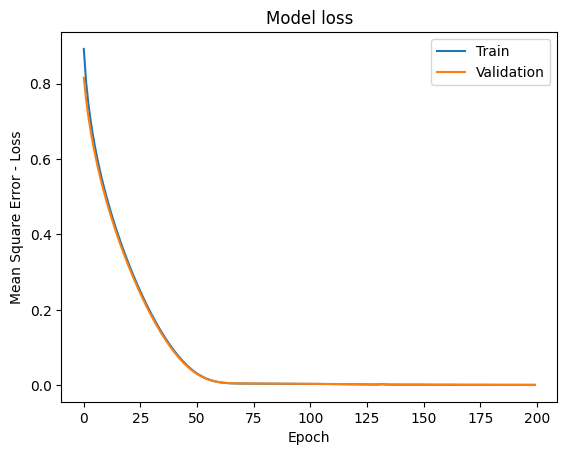

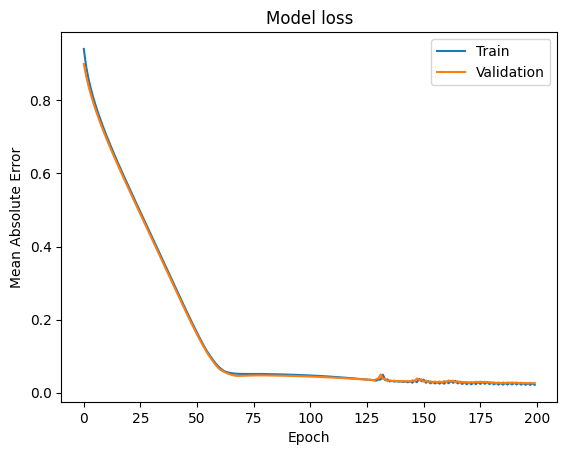

In [1156]:
##############
### Answer ###
##############

plot_loss(history)

❓ **Question** ❓ Is this a good or bad final accuracy?


Well ... How can you know? You can guess. But it is better to have a data-driven result. You should (almost) **always** have a **benchmark** value you should compare to. Otherwise, you optimize things without knowing if you are above straighforward benchmark algorithm.

❗ **Remark 1**:❗ **_REGRESSION_** The usual benchmark prediction is to predict `np.mean(y_train)` 

❗ **Remark 2**:❗ **_CLASSIFICATION_** The usual benchmark for a random prediction is usually 1./number_of_classes

here, let's compare to the following benchmark: the constant prediction. Your prediction of $y_i$ should be the last seen value of your sequence $X_i$

❓ **Question** ❓ Write a function compute the mean absolute error of the constant prediction, i.e. the fact that your prediction corresponds to the last seen value. 

❗ **Remark 1**:❗ Don't forget that X might be padded with values (as 0) that you do not have to take into account

In [1157]:
# def benchmark_prediction(X, y):

    # To complete

In [1158]:
##############
### Answer ###
##############

def benchmark_prediction(X, y):
    err = []
    for xi, yi in zip(X, y):
        xi = [_ for _ in xi if _ != 0]
        err.append(xi[-1] - yi[0])
    
    return np.mean(np.abs(err))

❓ **Question** ❓ Compare the model evaluated on the test set to the accuracy of the constant prediction. Conclusion?

In [1159]:
################
### Answer :

model_res = model.evaluate(X_test, y_test, verbose=0)
bench_res = benchmark_prediction(X_test, y_test)

print(f'Test set MAE with the model : {model_res[0]:.5f}')

print(f'Test set MAE with the constant prediction : {bench_res:.5f}')

print(f"Improvement over benchmark: {np.round((1 - (model_res[0]/bench_res))*100,2)} % \n")

Test set MAE with the model : 0.00073
Test set MAE with the constant prediction : 0.01396
Improvement over benchmark: 94.74 % 



# Optional #1

The previous setting was quite favorable:
- a large number of days: 50 to 70
- a few days in the future: 2
- a large number of sequences: 1000

In the following, you can try to change this parameters to see how the Neural network prediction gets when
- the number of seen days is lower
- the temporal horizon is higher
- the number of sequences is smaller.

❗ **Remark **:❗ Try to present your results in a visual way as if you had to report your results to someone - a TA for instance.

# Optional #2:

You can improve your results by:
- changing the hyperparameters of the LSTM
- using the GRU network
- stack multiple RNN layers